In [2]:
%load_ext autoreload
%autoreload 2

In [1]:
import pandas as pd
import json
from bib.cleaning import *
from bib.plot import *

In [4]:
data,contatos,contatos02 = generate_df()
#contatos = contacts_to_df(get_json(contatos))
#contatos02 = contacts_to_df(get_json(contatos02))
#df,contatos, contatos02,data = generate_all()

/home/miguel/Downloads/Code/Github/pesquisa_mestrado/bib/cleaning.py:23: RuntimeWarning: invalid value encountered in cast
  lista = np.array([np.concatenate(([id],j)).astype(int) for i,id in zip(lista,ids) for j in i])
/home/miguel/Downloads/Code/Github/pesquisa_mestrado/bib/cleaning.py:23: RuntimeWarning: invalid value encountered in cast
  lista = np.array([np.concatenate(([id],j)).astype(int) for i,id in zip(lista,ids) for j in i])
/home/miguel/Downloads/Code/Github/pesquisa_mestrado/bib/cleaning.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['id'] = data.index


In [135]:
data

,Idade,Sexo,#Familiares,Profissão,Setor,id,#Contatos01,#Contatos02,Dia01,Dia02
0,38,2,2,9.0,NaN,0,2,1,105.0,205.0
1,0,2,4,5.0,10.0,1,6,4,2004.0,2104.0
2,18,2,4,7.0,NaN,2,11,10,205.0,305.0
3,74,1,2,8.0,NaN,3,6,1,2904.0,3004.0
4,71,1,1,8.0,NaN,4,3,2,2004.0,2104.0
...,...,...,...,...,...,...,...,...,...,...
2028,12,2,4,7.0,NaN,2028,10,9,2404.0,2504.0
2029,2,1,4,10.0,NaN,2029,10,15,2204.0,2304.0
2030,22,1,5,5.0,9.0,2030,9,10,1704.0,1804.0
2031,0,1,5,NaN,NaN,2031,8,9,2404.0,2504.0


In [117]:
contatos

,id,idade,sexo,pele,frequência,duração,local
0,0,68,1,2,1,5,"[1, 0, 0, 0, 0, 0, 0]"
1,0,55,2,1,2,3,"[1, 0, 0, 0, 0, 0, 0]"
2,1,29,1,1,1,5,"[1, 0, 0, 0, 1, 0, 1]"
3,1,33,2,1,1,4,"[1, 0, 0, 0, 0, 0, 0]"
4,1,3,1,1,1,5,"[1, 0, 0, 1, 0, 0, 1]"
...,...,...,...,...,...,...,...
19839,2032,47,2,2,5,2,"[0, 0, 0, 0, 0, 0, 1]"
19840,2032,47,2,2,5,2,"[0, 0, 0, 0, 0, 0, 1]"
19841,2032,52,2,2,5,2,"[0, 0, 0, 0, 0, 0, 1]"
19842,2032,62,1,2,5,2,"[0, 0, 0, 0, 0, 0, 1]"


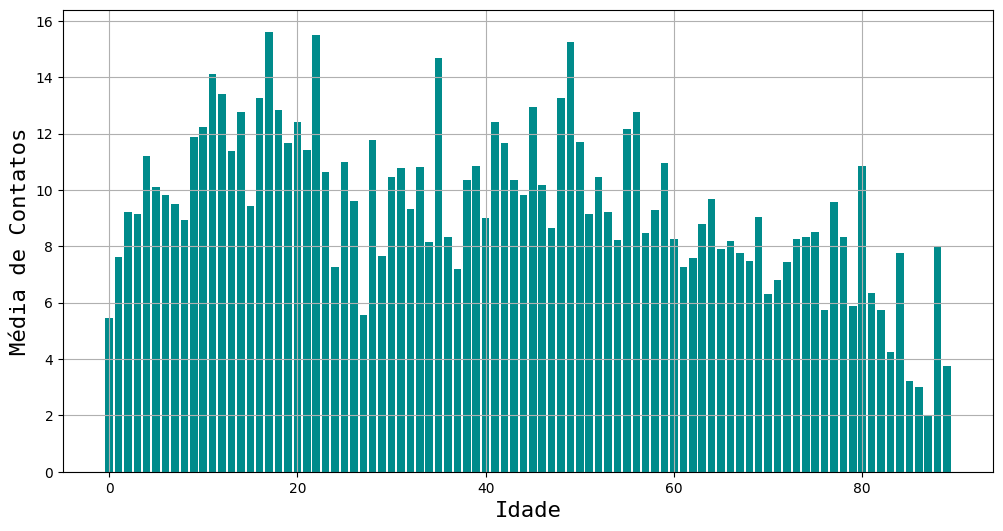

In [76]:
plot_contatos_idade(
    contatos,
    data,
    'idade_contatos'
    ,''
)

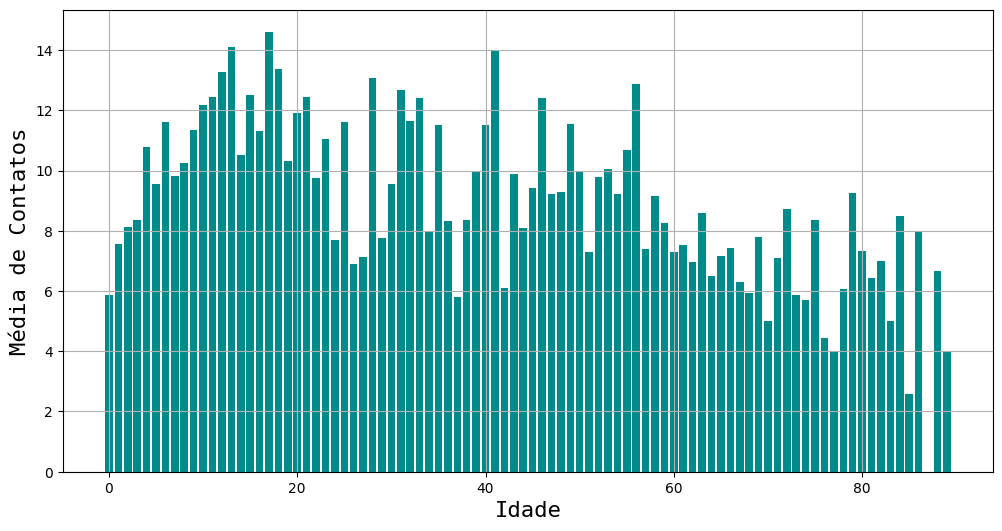

In [78]:
plot_contatos_idade(
    contatos02,
    data,
    'idade_contatos_02',
    ''
)

In [72]:
plot_mes(contatos,'contatos_mes')

KeyError: 'dia/mês'

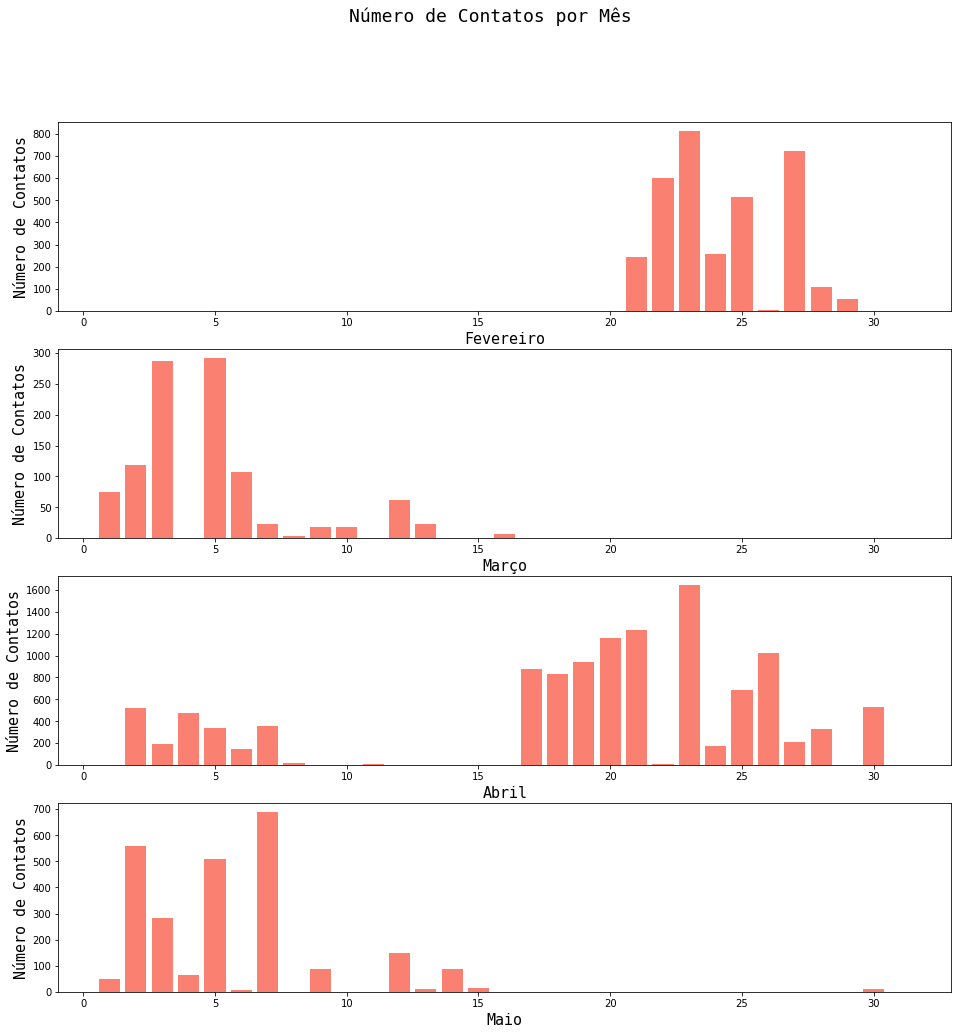

In [14]:
plot_mes(contatos02,'contatos_mes02')

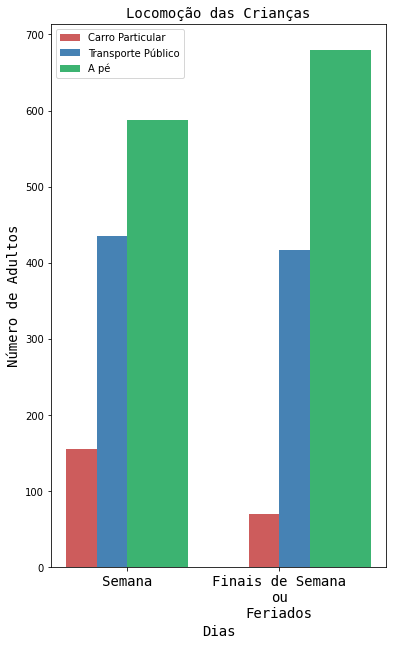

In [15]:
locomotion_hist(
    df[df["Tipo de questionário"] == 0],
    'Locomoção das Crianças',
    'locomotion_criancas'
)

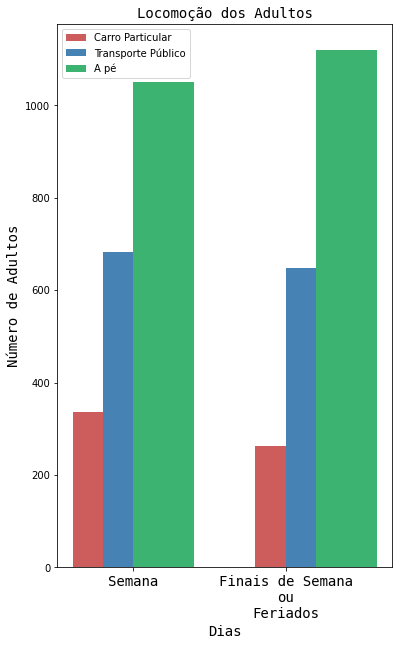

In [16]:
locomotion_hist(
    df[df["Tipo de questionário"] == 1],
    'Locomoção dos Adultos',
    'locomotion_adultos'
)

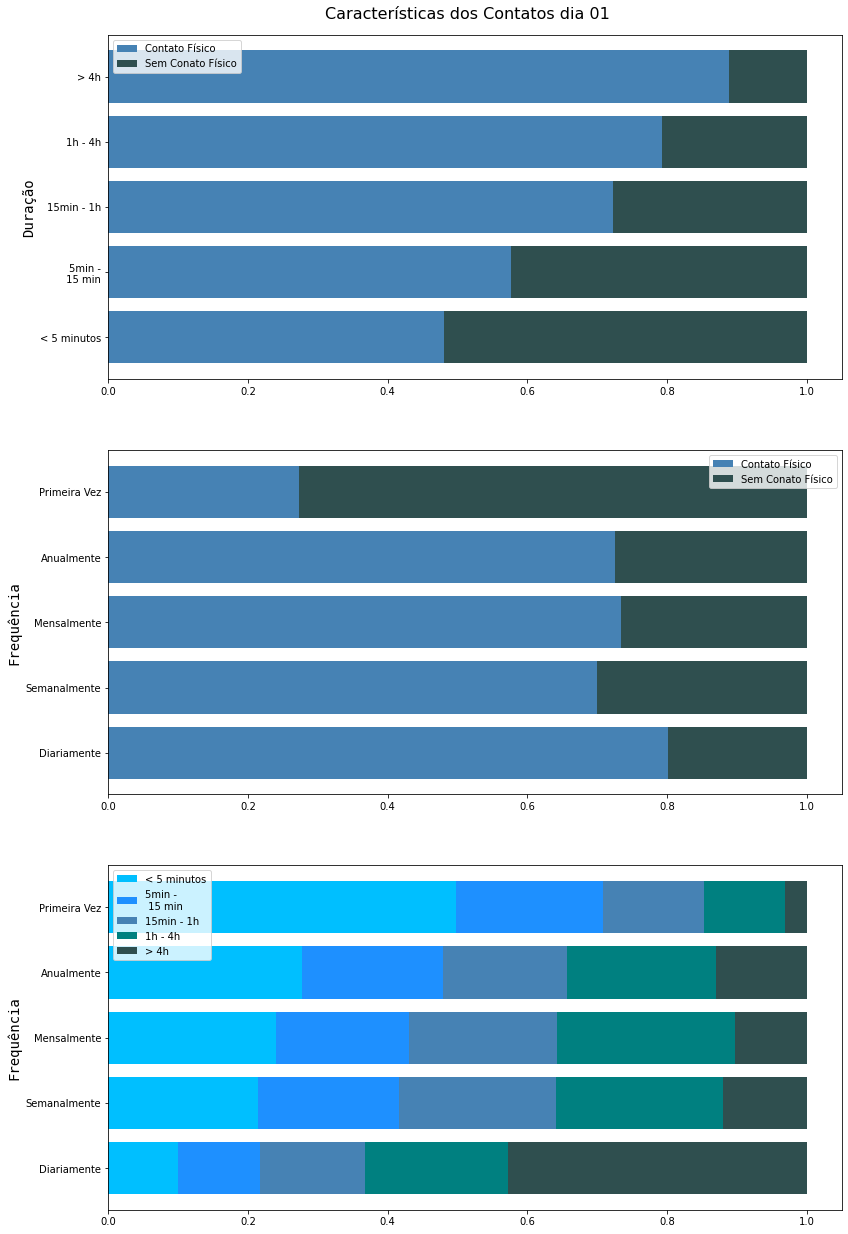

In [17]:
multiple_stacked_bar(
    contacts,
    'Características dos Contatos dia 01',
    'contatos01'
)

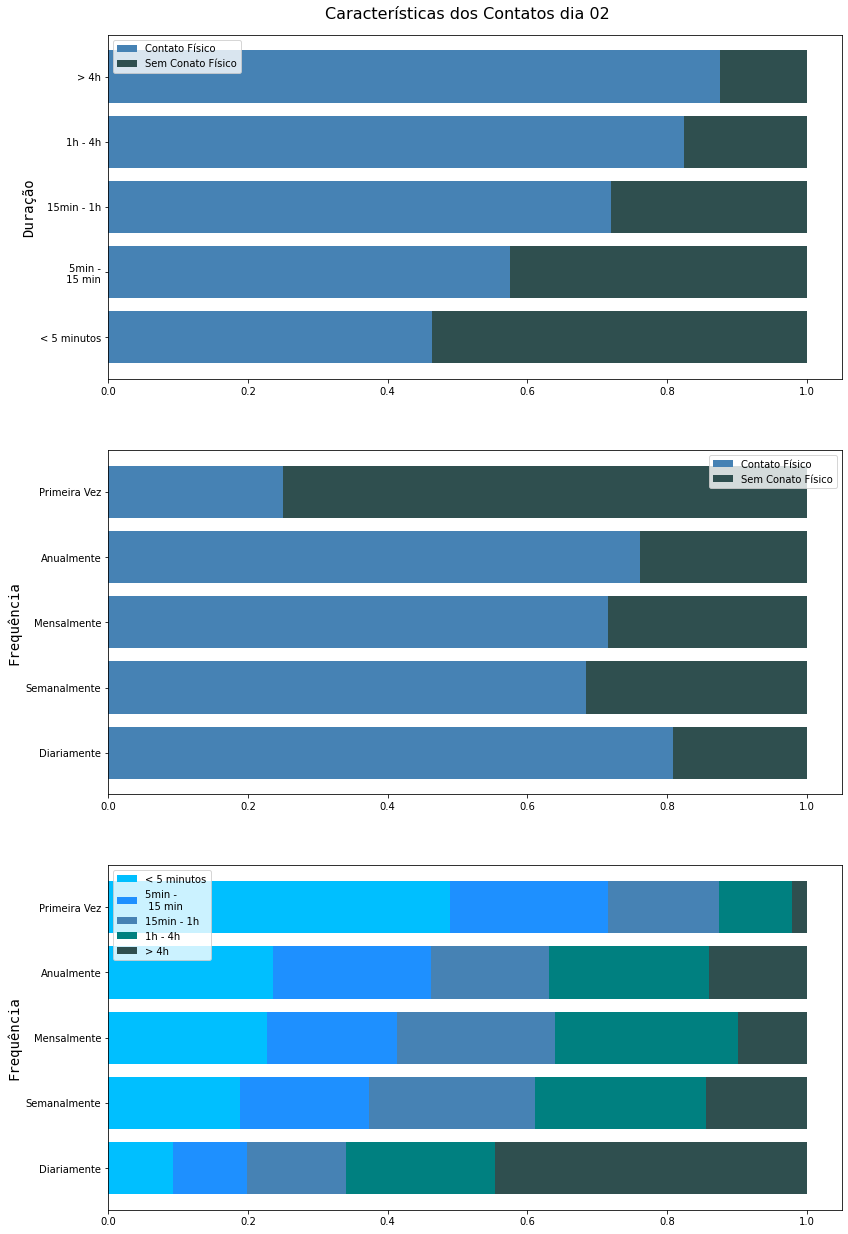

In [20]:
multiple_stacked_bar(
    contacts02,
    'Características dos Contatos dia 02',
    'contatos02'
)

In [113]:
contatos

,id,idade,Frequência,Pele,Duração
0,0,68.0,1.0,2.0,5.0
1,0,55.0,2.0,1.0,3.0
2,1,29.0,1.0,1.0,5.0
3,1,33.0,1.0,1.0,4.0
4,1,3.0,1.0,1.0,5.0
...,...,...,...,...,...
19839,2032,47.0,5.0,2.0,2.0
19840,2032,47.0,5.0,2.0,2.0
19841,2032,52.0,5.0,2.0,2.0
19842,2032,62.0,5.0,2.0,2.0


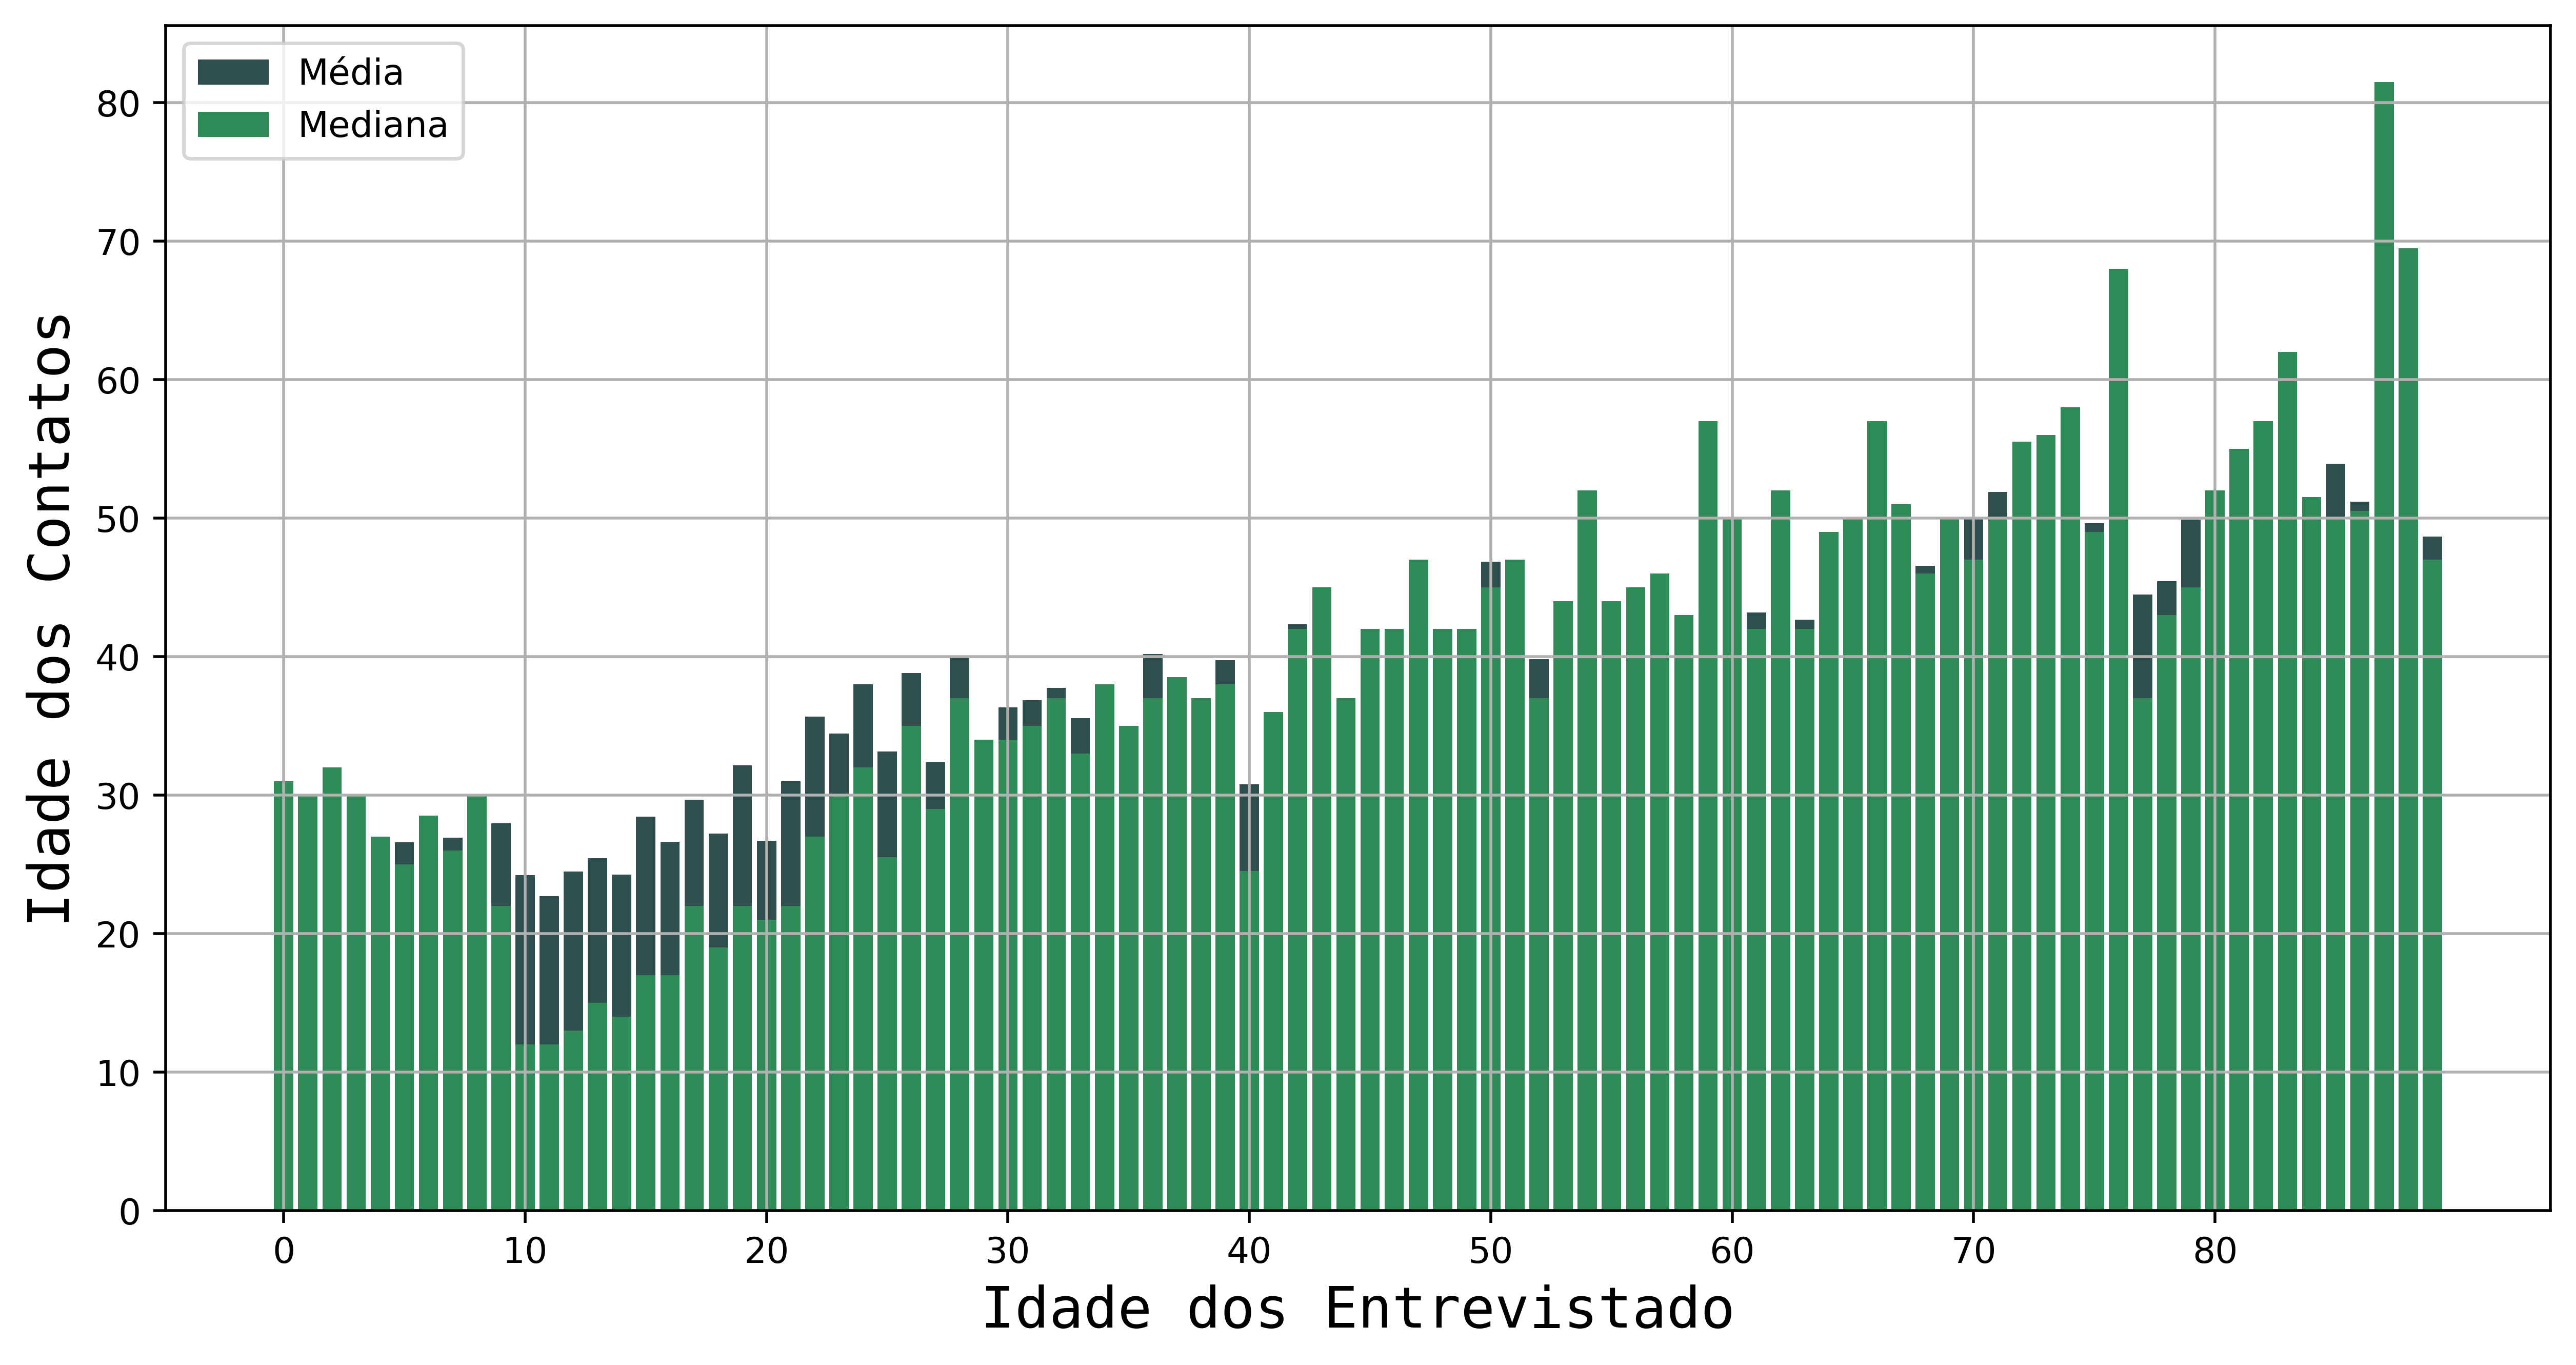

In [112]:
conncection_idade(contatos,data)

/home/miguel/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/miguel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


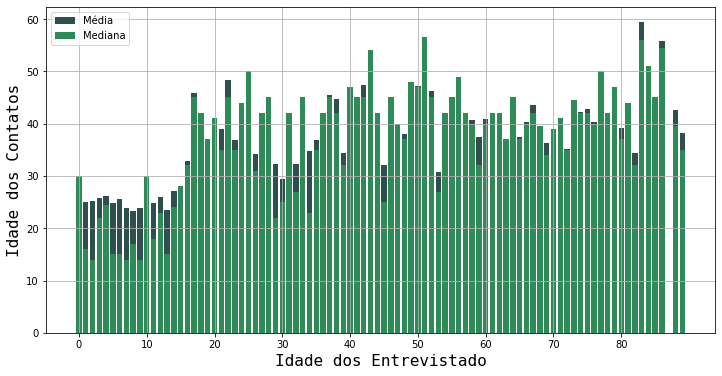

In [61]:
conncection_idade(contacts02,df)

In [5]:
C = heat_conncetion(data,contatos,contatos02)

In [6]:
C

array([[2254,  455, 1502,  674,  160],
       [ 455,  319,  437,  378,   84],
       [1502,  437,  540, 1055,  273],
       [ 674,  378, 1055,  831,  455],
       [ 160,   84,  273,  455,  173]])

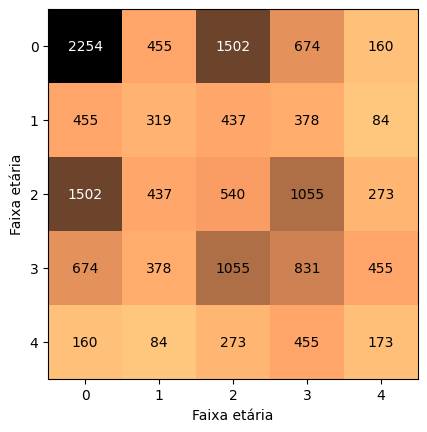

In [7]:
for i in range(C.shape[0]):
    for j in range(C.shape[1]):
        text = plt.text(j, i, round(C[i, j], 2),ha='center', va='center', color='w' if(C[i,j] > 1500) else 'k')
plt.imshow(C, cmap='copper_r')
plt.xlabel("Faixa etária")
plt.ylabel("Faixa etária")
#plt.colorbar()
plt.show()

In [29]:
faixas, total = np.unique(data['Faixas'],return_counts=True)
M = np.zeros((len(total),len(total)))
for i in range(len(total)):
    for j in range(len(total)):
        M[i][j] = total[i]*total[j] if(i!=j) else total[i]*(total[i]-1)/2
M = C/M

In [30]:
M

array([[0.00613078, 0.00313789, 0.00757828, 0.00143087, 0.00082513],
       [0.00313789, 0.02247112, 0.01119393, 0.00407411, 0.0021993 ],
       [0.00757828, 0.01119393, 0.0203275 , 0.00831894, 0.00522928],
       [0.00143087, 0.00407411, 0.00831894, 0.00552431, 0.00366717],
       [0.00082513, 0.0021993 , 0.00522928, 0.00366717, 0.00680433]])

In [17]:
total

array([858, 169, 231, 549, 226])

In [28]:
np.savetxt("./Julia/input/probability.txt",M,fmt = "%f")

In [25]:
M

array([[0.00613078, 0.00313789, 0.00757828, 0.00143087, 0.00082513],
       [0.00313789, 0.02247112, 0.01119393, 0.00407411, 0.0021993 ],
       [0.00757828, 0.01119393, 0.0203275 , 0.00831894, 0.00522928],
       [0.00143087, 0.00407411, 0.00831894, 0.00552431, 0.00366717],
       [0.00082513, 0.0021993 , 0.00522928, 0.00366717, 0.00680433]])

In [16]:
np.savetxt("./output/P.txt",total/np.sum(total),fmt = "%f")

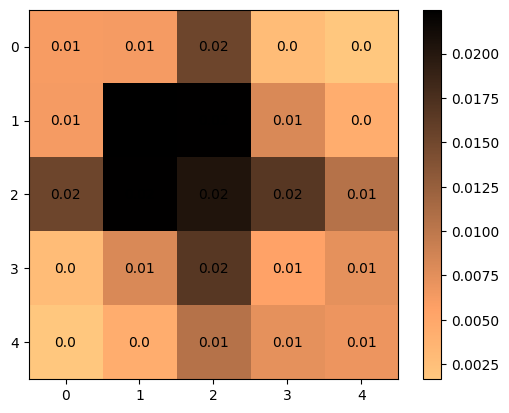

In [236]:
for i in range(M.shape[0]):
    for j in range(M.shape[1]):
        text = plt.text(j, i, round(M[i, j], 2),ha='center', va='center', color='w' if(M[i,j] > 1500) else 'k')
plt.imshow(M, cmap='copper_r')
plt.colorbar()
plt.show()

array([[0.00613078, 0.00627578, 0.01515656, 0.00286174, 0.00165027],
       [0.00627578, 0.02247112, 0.02238787, 0.00814822, 0.0043986 ],
       [0.01515656, 0.02238787, 0.0203275 , 0.01663789, 0.01045857],
       [0.00286174, 0.00814822, 0.01663789, 0.00552431, 0.00733433],
       [0.00165027, 0.0043986 , 0.01045857, 0.00733433, 0.00680433]])

In [13]:
mortalidade = {}

In [16]:
df = pd.read_csv(
        './input/INFLUD20-06-03-2023.csv',
        delimiter = ';',
        usecols = ['NU_IDADE_N','EVOLUCAO','CLASSI_FIN','HOSPITAL']
    )
covid = df[df['CLASSI_FIN'] == 5]
covid.drop('CLASSI_FIN', inplace=True, axis=1)
covid = covid.dropna()

/tmp/ipykernel_22921/2205904236.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid.drop('CLASSI_FIN', inplace=True, axis=1)


In [17]:
covid

,NU_IDADE_N,HOSPITAL,EVOLUCAO
28,56,1.0,1.0
37,70,1.0,1.0
50,36,1.0,1.0
59,26,1.0,2.0
73,3,2.0,1.0
...,...,...,...
1200777,31,1.0,1.0
1200778,42,1.0,1.0
1200780,57,1.0,1.0
1200781,42,1.0,2.0


In [18]:
def transform_faixa(i,Faixa):
    for j in range(len(Faixa)):
        if(i < Faixa[j][0]):
            return j - 1
    return j

In [19]:
Faixa = [
    [0,20],
    [20,30],
    [30,50],
    [50,70],
    [70,10000]
]

In [20]:
Idade = covid['NU_IDADE_N'].values
Idade = np.array([transform_faixa(i,Faixa) for i in Idade])
covid['Faixa'] = Idade

In [23]:
[covid[covid['Faixa'] == i][covid['HOSPITAL'] == 1].shape[0]/covid[covid["Faixa"] == i].shape[0] for i in range(5)]

/tmp/ipykernel_22921/472860784.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  [covid[covid['Faixa'] == i][covid['HOSPITAL'] == 1].shape[0]/covid[covid["Faixa"] == i].shape[0] for i in range(5)]


[0.9352304238742902,
 0.8897440118528274,
 0.9537660747091243,
 0.9781091199827794,
 0.9741458404655939]

In [25]:
covid[covid['Faixa'] == 0][covid['HOSPITAL'] == 1]

/tmp/ipykernel_22921/3342552732.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  covid[covid['Faixa'] == 0][covid['HOSPITAL'] == 1]


,NU_IDADE_N,HOSPITAL,EVOLUCAO,Faixa
123,1,1.0,1.0,0
236,18,1.0,1.0,0
507,1,1.0,1.0,0
665,3,1.0,1.0,0
749,19,1.0,1.0,0
...,...,...,...,...
1200373,6,1.0,1.0,0
1200480,19,1.0,1.0,0
1200604,19,1.0,1.0,0
1200608,5,1.0,1.0,0


In [75]:
df = covid[covid['FEBRE'] == 2]
df = df[df['TOSSE'] == 2]
df = df[df['DESC_RESP'] == 2]
df = df[df['SATURACAO'] == 2]
df = df[df['FADIGA'] != 1]
df = df[df['PERD_OLFT'] != 1]
df = df[df['PERD_PALA'] != 1]

In [76]:
for i in range(5):
    print(100*df[df['Faixa'] == i].shape[0]/covid[covid['Faixa'] == i].shape[0], '%')

8.11731595319212 %
6.425942504724958 %
3.350111519681717 %
3.1883341571922887 %
3.6475935205686985 %


In [77]:
df

,NU_IDADE_N,FEBRE,TOSSE,DESC_RESP,SATURACAO,EVOLUCAO,FADIGA,PERD_OLFT,PERD_PALA,Faixa
792,61,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,3
1820,56,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3
2554,43,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2
3634,32,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2
3785,81,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,4
...,...,...,...,...,...,...,...,...,...,...
1200396,63,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3
1200398,31,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2
1200423,47,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2
1200424,34,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2


In [5]:
mortalidade['sem vacina'] = generate_mortalidade(df)

In [6]:
mortalidade

{'sem vacina': {'0 <= Idade < 20 ': 0.07355182926829268,
  '20 <= Idade < 30 ': 0.08337555414819506,
  '30 <= Idade < 50 ': 0.13536964163018234,
  '50 <= Idade < 70 ': 0.30269612895246734,
  '70 <= Idade < 100000 ': 0.5266224287233722}}

In [7]:
df = pd.read_csv(
    "./input/INFLUD21-06-02-2023.csv",
    delimiter = ';',
    usecols = ['NU_IDADE_N','EVOLUCAO','CLASSI_FIN','VACINA_COV',"FAB_COV_1"]
)
df = df[df['CLASSI_FIN'] == 5].dropna()

In [9]:
vacinas = ["pfizer","ASTRAZENECA","jansen","coronavac"]
vacinas = [ i.lower() for i in vacinas]

In [12]:
for vacina in vacinas:
    mortalidade[vacina]= generate_mortalidade(df,vacina)

In [13]:
mortalidade

{'sem vacina': {'0 <= Idade < 20 ': 0.07355182926829268,
  '20 <= Idade < 30 ': 0.08337555414819506,
  '30 <= Idade < 50 ': 0.13536964163018234,
  '50 <= Idade < 70 ': 0.30269612895246734,
  '70 <= Idade < 100000 ': 0.5266224287233722},
 'pfizer': {'0 <= Idade < 20 ': 0.014744145706851692,
  '20 <= Idade < 30 ': 0.012380504623099827,
  '30 <= Idade < 50 ': 0.016801984663960306,
  '50 <= Idade < 70 ': 0.011785099222205964,
  '70 <= Idade < 100000 ': 0.005602393849379696},
 'astrazeneca': {'0 <= Idade < 20 ': 0.006071118820468344,
  '20 <= Idade < 30 ': 0.014417802852217521,
  '30 <= Idade < 50 ': 0.037686062246278754,
  '50 <= Idade < 70 ': 0.08039081054918337,
  '70 <= Idade < 100000 ': 0.05815350340730386},
 'jansen': {'0 <= Idade < 20 ': 0.0,
  '20 <= Idade < 30 ': 0.0003134304967873374,
  '30 <= Idade < 50 ': 0.0007668019846639603,
  '50 <= Idade < 70 ': 7.879244943213157e-05,
  '70 <= Idade < 100000 ': 4.368338284116722e-05},
 'coronavac': {'0 <= Idade < 20 ': 0.010407632263660017,

In [95]:
with open('./dados/mortalidades.json', 'w') as f:
    json.dump(mortalidade, f)

In [24]:
list(contatos.iloc[[0,1],1])

[68.0, 55.0]

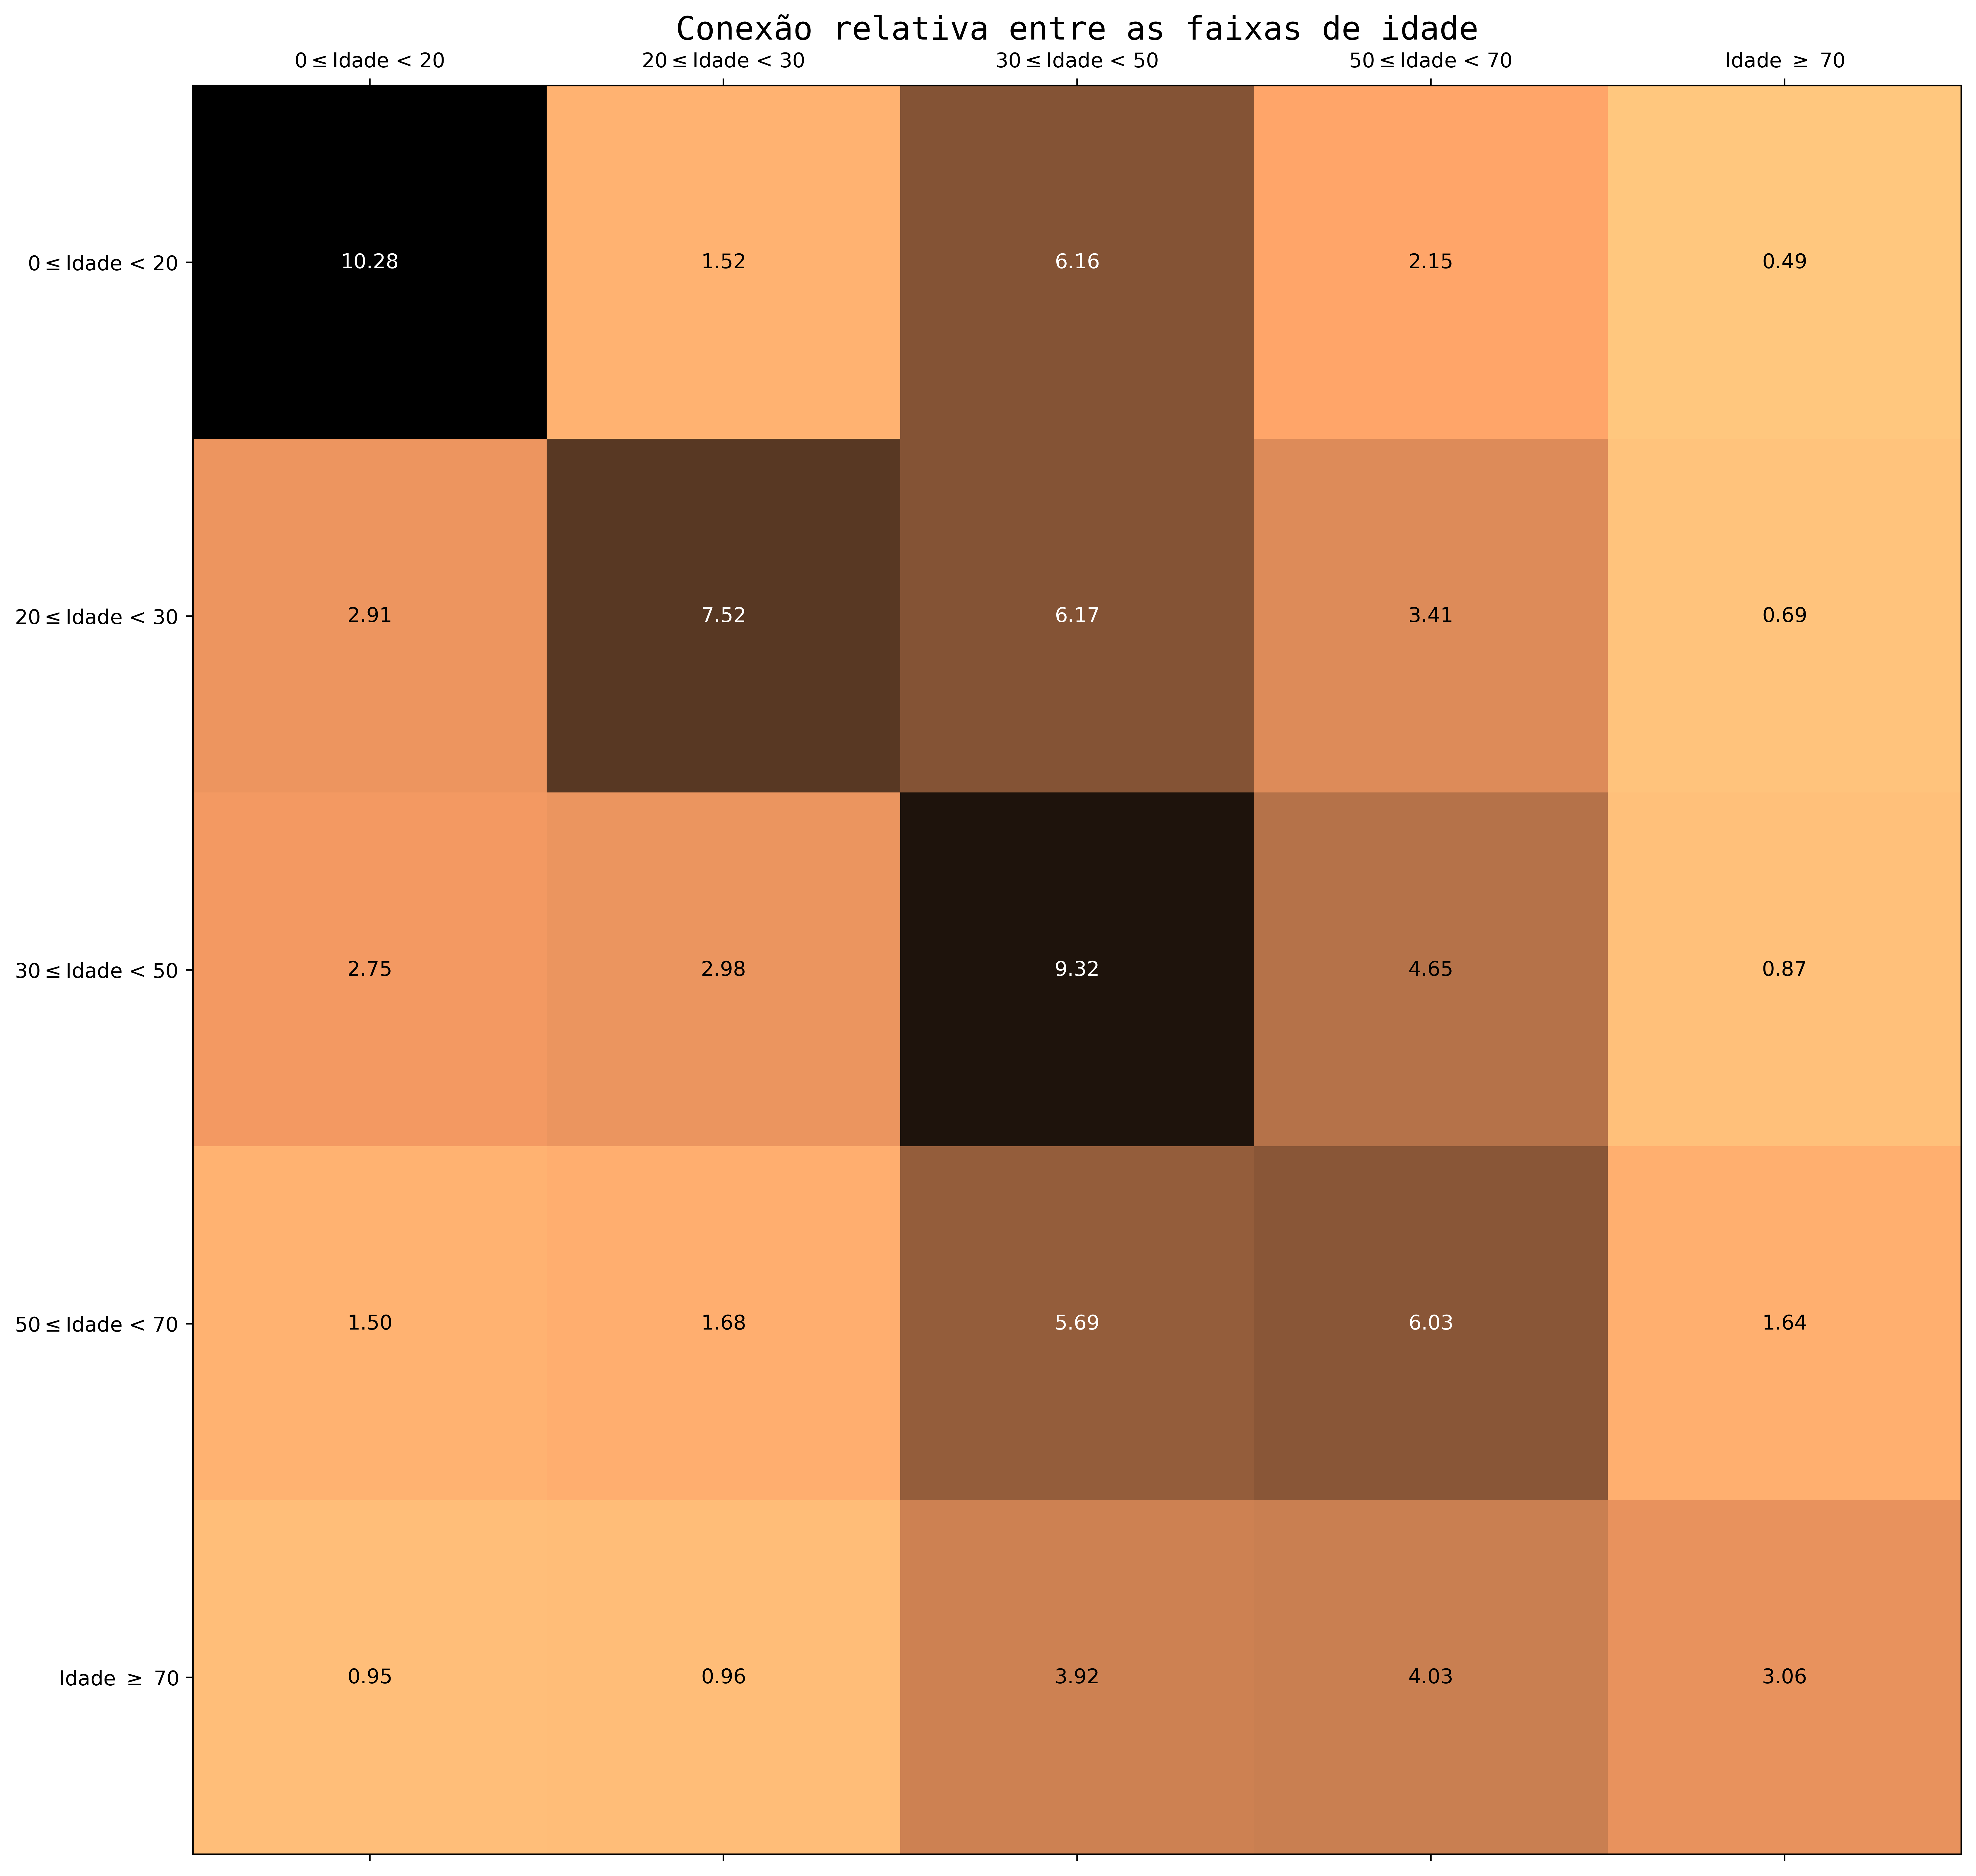

In [84]:
adj(data,contatos,contatos02,Nmortos)

In [74]:
contatos.shape

(19844, 5)

In [75]:
contatos02.shape

(18137, 5)

In [1]:
5 in (5,2)

True